In [10]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [11]:
TRAIN_DIR = ('C:/Users/shahe/Desktop/brain_tumor_dataset/train/')
TEST_DIR = ('C:/Users/shahe/Desktop/brain_tumor_dataset/test/')

In [12]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 6e-6
NUM_CLASSES = 2 # We are aware of it.

In [13]:
import os
CLASSES = os.listdir(TRAIN_DIR)
NUM_CLASSES = len(CLASSES)
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['no', 'yes'] 
 and the length is : 2


In [14]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [15]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 253 images belonging to 2 classes.


In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
test_set = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 253 images belonging to 2 classes.


In [18]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [20]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [21]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [24]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\shahe\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
8/8 [==============================] - 142s 18s/step - loss: 1.2053 - accuracy: 0.5743 - val_loss: 1.0459 - val_accuracy: 0.6126
Epoch 2/20
8/8 [==============================] - 140s 19s/step - loss: 0.8304 - accuracy: 0.6748 - val_loss: 0.4433 - val_accuracy: 0.8142
Epoch 3/20
8/8 [==============================] - 139s 19s/step - loss: 0.4564 - accuracy: 0.8265 - val_loss: 0.5274 - val_accuracy: 0.7628
Epoch 4/20
8/8 [==============================] - 138s 18s/step - loss: 0.5505 - accuracy: 0.7589 - val_loss: 0.2728 - val_accuracy: 0.8893
Epoch 5/20
8/8 [==============================] - 139s 18s/step - loss: 0.2393 - accuracy: 0.9139 - val_loss: 0.2030 - val_accuracy: 0.9209
Epoch 6/20
8/8 [==============================] - 139s 19s/step - loss: 0.2610 - accuracy: 0.9201 - val_loss: 0.2436 - val_accuracy: 0.8972
Epoch 7/20
8/8 [==============================] - 140s 19s/step - loss: 0.2331 - accuracy: 0.8858 - val_loss: 0.1608 - val_accuracy: 0.9486
Epoch 8/20
8/8 [====

In [25]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    print(result)
    if(result[0][0] < 0.5):
        result="tumor"
    else:
        result="no tumor"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    

In [26]:
# get sample image to test.
img_normal = image.load_img('C:/Users/shahe/Desktop/brain_tumor_dataset/test/yes/Y52.jpg', target_size = (224, 224))
img_pneumonia = image.load_img('C:/Users/shahe/Desktop/brain_tumor_dataset/test/no/no 10.jpg', target_size = (224, 224))

[[0. 1.]]
[[1. 0.]]


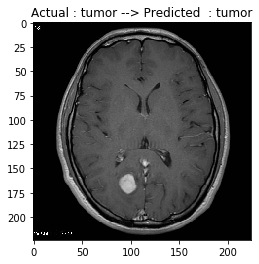

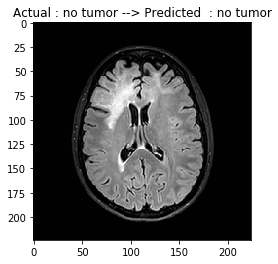

In [27]:
pred_normal = model_predict(img_normal, "tumor")
pred_pneumonia = model_predict(img_pneumonia, "no tumor")

In [28]:
model.save("Brain Tumor Detection.h5")

In [31]:
from tensorflow.keras.models import load_model
m1 = load_model("Brain Tumor Detection.h5")

In [38]:
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = m1.predict(x_processed)
    print(result)
    if(result[0][0] < 0.5):
        result="tumor"
    else:
        result="no tumor"
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

[[0. 1.]]


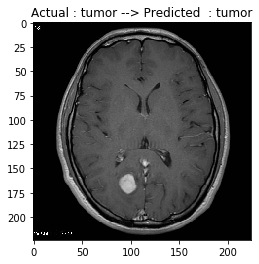

In [40]:
model_predict(img_normal, 'tumor')